In [1]:
import clip
import torch
import cv2
import numpy as np
from PIL import Image
from  matplotlib import pyplot as plt
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from torchvision.transforms import InterpolationMode
BICUBIC = InterpolationMode.BICUBIC

https://arxiv.org/pdf/2304.05653
https://github.com/xmed-lab/CLIP_Surgery/blob/master/demo.ipynb

https://gist.github.com/tanukon/55715b577a32998f3417e7cea268c658#file-clip_surgery_experiment-ipynb

https://pub.towardsai.net/explainable-ai-for-clip-the-architecture-explanation-and-its-application-for-segment-anything-b78ad5f05bb6

## CLIP Surgery
***

+ CLIP tends to focus on background regions rather than foregrounds, with noisy activations at irrelevant positions on the visualization results. These phenomena conflict with conventional explainability methods based on the class attention map (CAM), where the raw model can highlight the local foreground regions using global supervision without alignment.  To address
these problems, we take a closer look at its architecture and features.
+ the raw self-attentions link to inconsistent semantic regions, resulting in the opposite visualization
+ the noisy activations are owing to redundant features among categories
+ CLIP Surgery is a method that allows surgery-like modifications to the inference architecture and features, without further fine-tuning as classical CAM methods. This approach significantly improves the explainability of CLIP, surpassing existing methods by large margins. Besides, it enables multimodal visualization and extends the capacity of raw CLIP on open-vocabulary tasks without extra alignment.

+  direct application of the basic CAM to CLIP reveals a tendency of CLIP to prioritize
background regions over foregrounds, leading to ”noisy activations” with ”opposite visualizations”
as shown in Figure 1. 

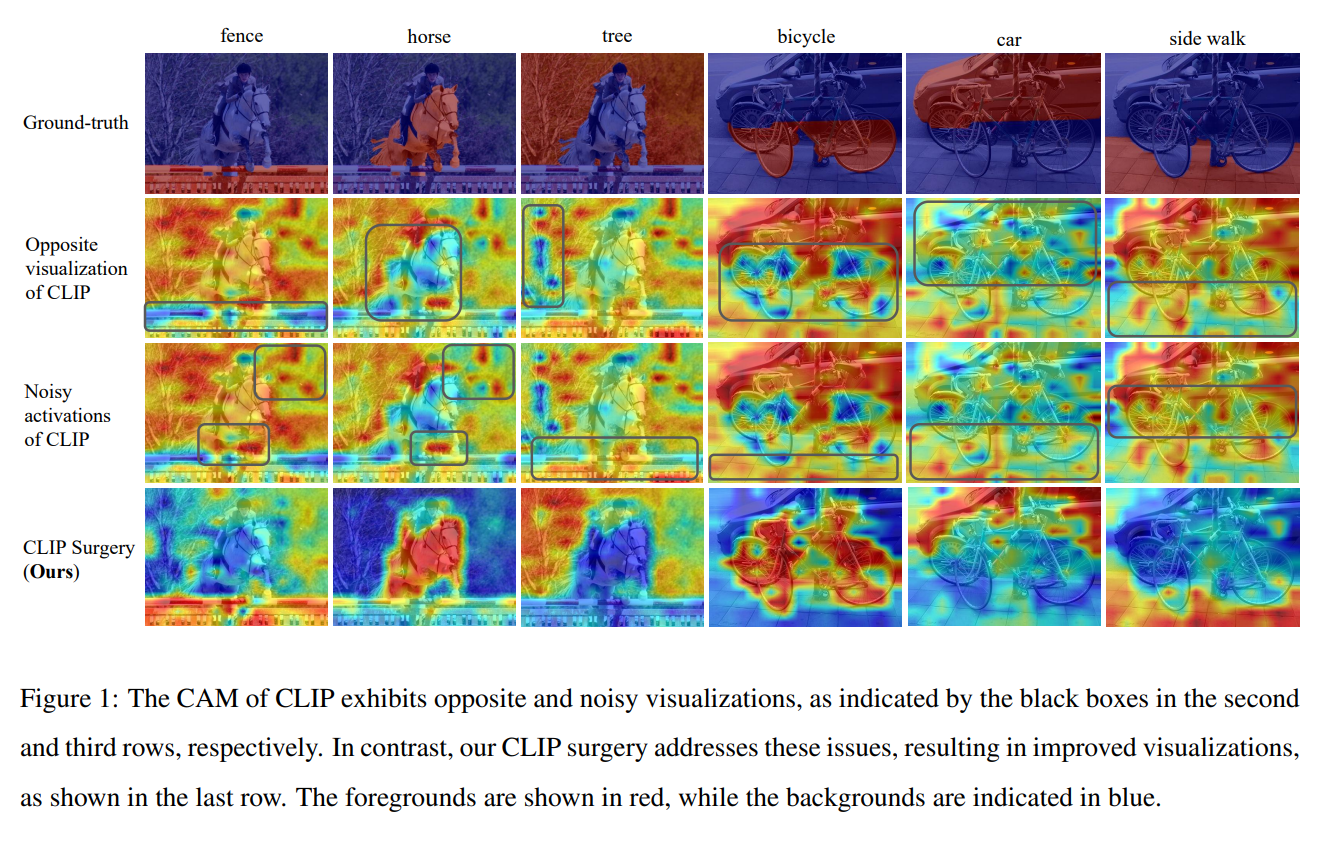

+ For the architecture, we observe that the self-attention layers build relations among inconsistent semantic
regions (see. Fig. 4), resulting in the opposite visualization.

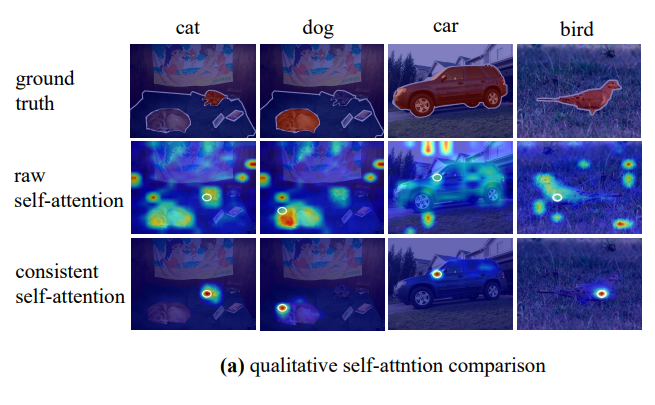

+ For the features, we find the noisy activations are usually irrelevant to labels, appearing with empty textual input (see Fig. 6), which suggests some features are redundant among categories

In the context you provided, features refer to the representations or activations within the layers of a neural network model, such as CLIP, that encode information extracted from the input data (text or images). These features are the internal data representations the model computes as it processes the input through its layers.

Here’s a breakdown of what is meant by features in this context:

1. Definition of Features
Features in Neural Networks: These are numerical representations (often multi-dimensional vectors) that capture specific attributes or patterns in the input data.
In CLIP: Features might include representations of textual or visual information in a shared embedding space. These features are used to determine how well a piece of text matches an image (or vice versa).
2. Noisy Activations and Redundant Features
Noisy Activations: The term refers to activations (non-zero outputs in neurons) that occur in response to irrelevant or extraneous aspects of the input data. For example, when the input is an empty text prompt, the model might still produce activations unrelated to any meaningful label.
Redundant Features: These are features that do not contribute uniquely to the model’s predictions or understanding of the input. They may represent unnecessary or overlapping information across different categories, adding noise instead of helping refine predictions.


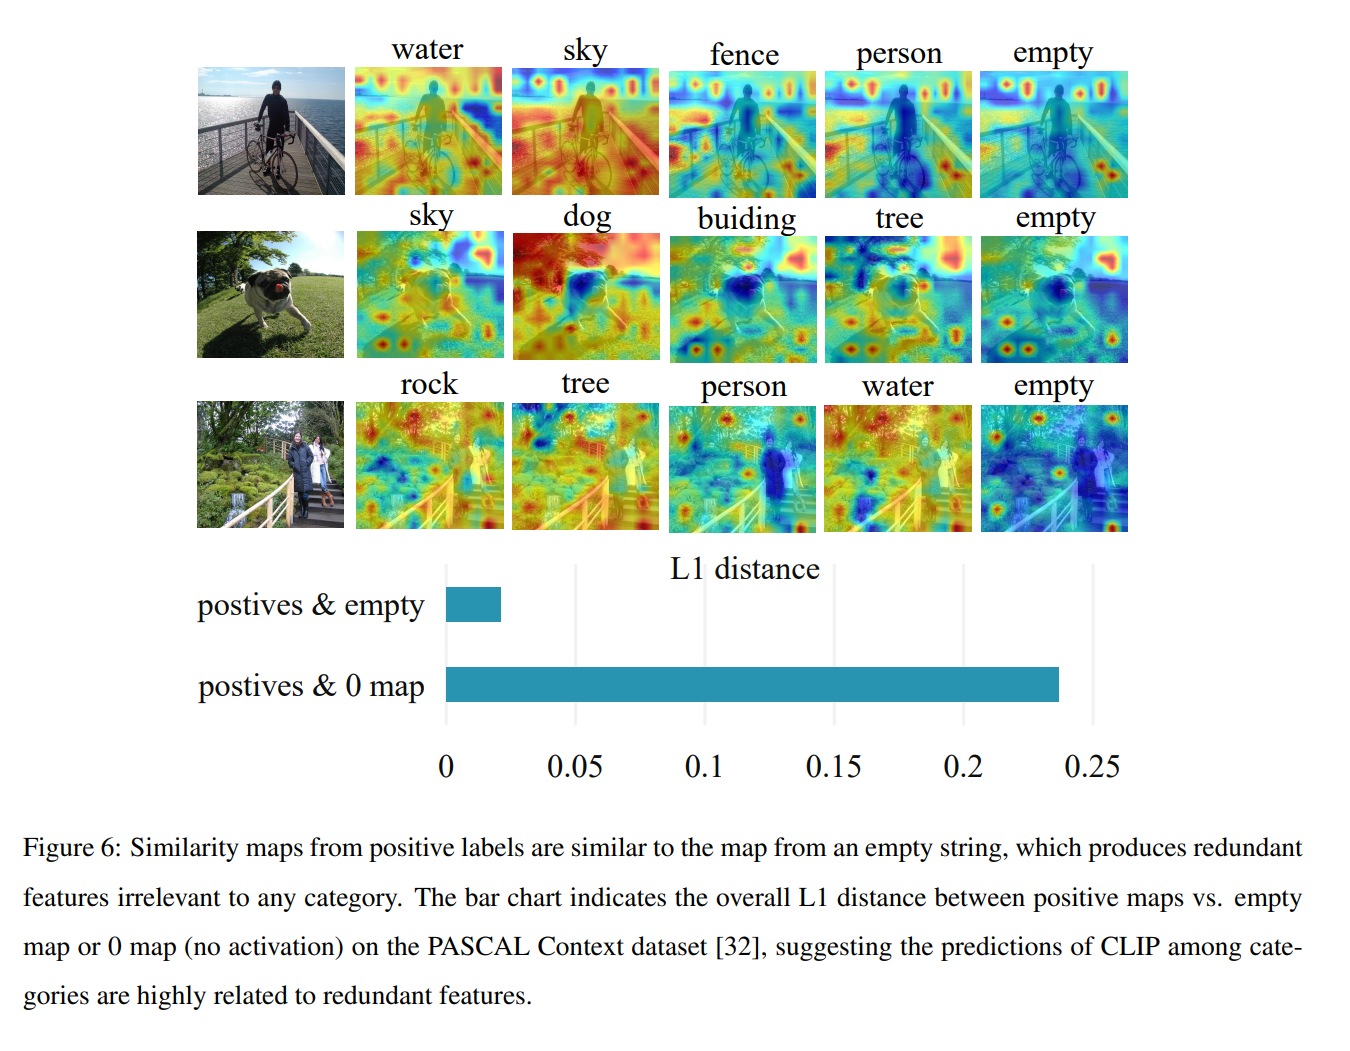

+ CLIP Surgery for reliable CAM, an approach that allows surgery-like modifications to the inference architecture
and output features on the raw CLIP, called CLIP architecture surgery and CLIP feature surgery
+ the architecture surgery is designed to solve the opposite visualization
via reforming a consistent self-attention module using original parameters, and aggregate partial
beneficial modules via a dual paths structure. Besides, we identify common features across classes
as redundant features and mitigate them in the feature surgery to mitigate noisy activations.

This paper has three main contributions:
1) We observe that CLIP exhibits opposite visualization and noisy activations. Then, we discover that these phenomena are accompanied by inconsistent self-attention and redundant
features among categories, respectively.

2) Based on these insights, we propose the CLIP Surgery for reliable CAM, consisting of
architecture and feature surgery without fine-tuning.

3) The proposed method greatly improves the explainability of CLIP across various backbones
and datasets, with wide applicability on multimodal visualization and open-vocabulary tasks.


We discover how the opposite visualization happens, with our solution: consistent self-attention and dual paths. In Sec. 3.3, we observe that the noisy activation is related to redundant features among categories, then propose the feature surgery to mitigate it.
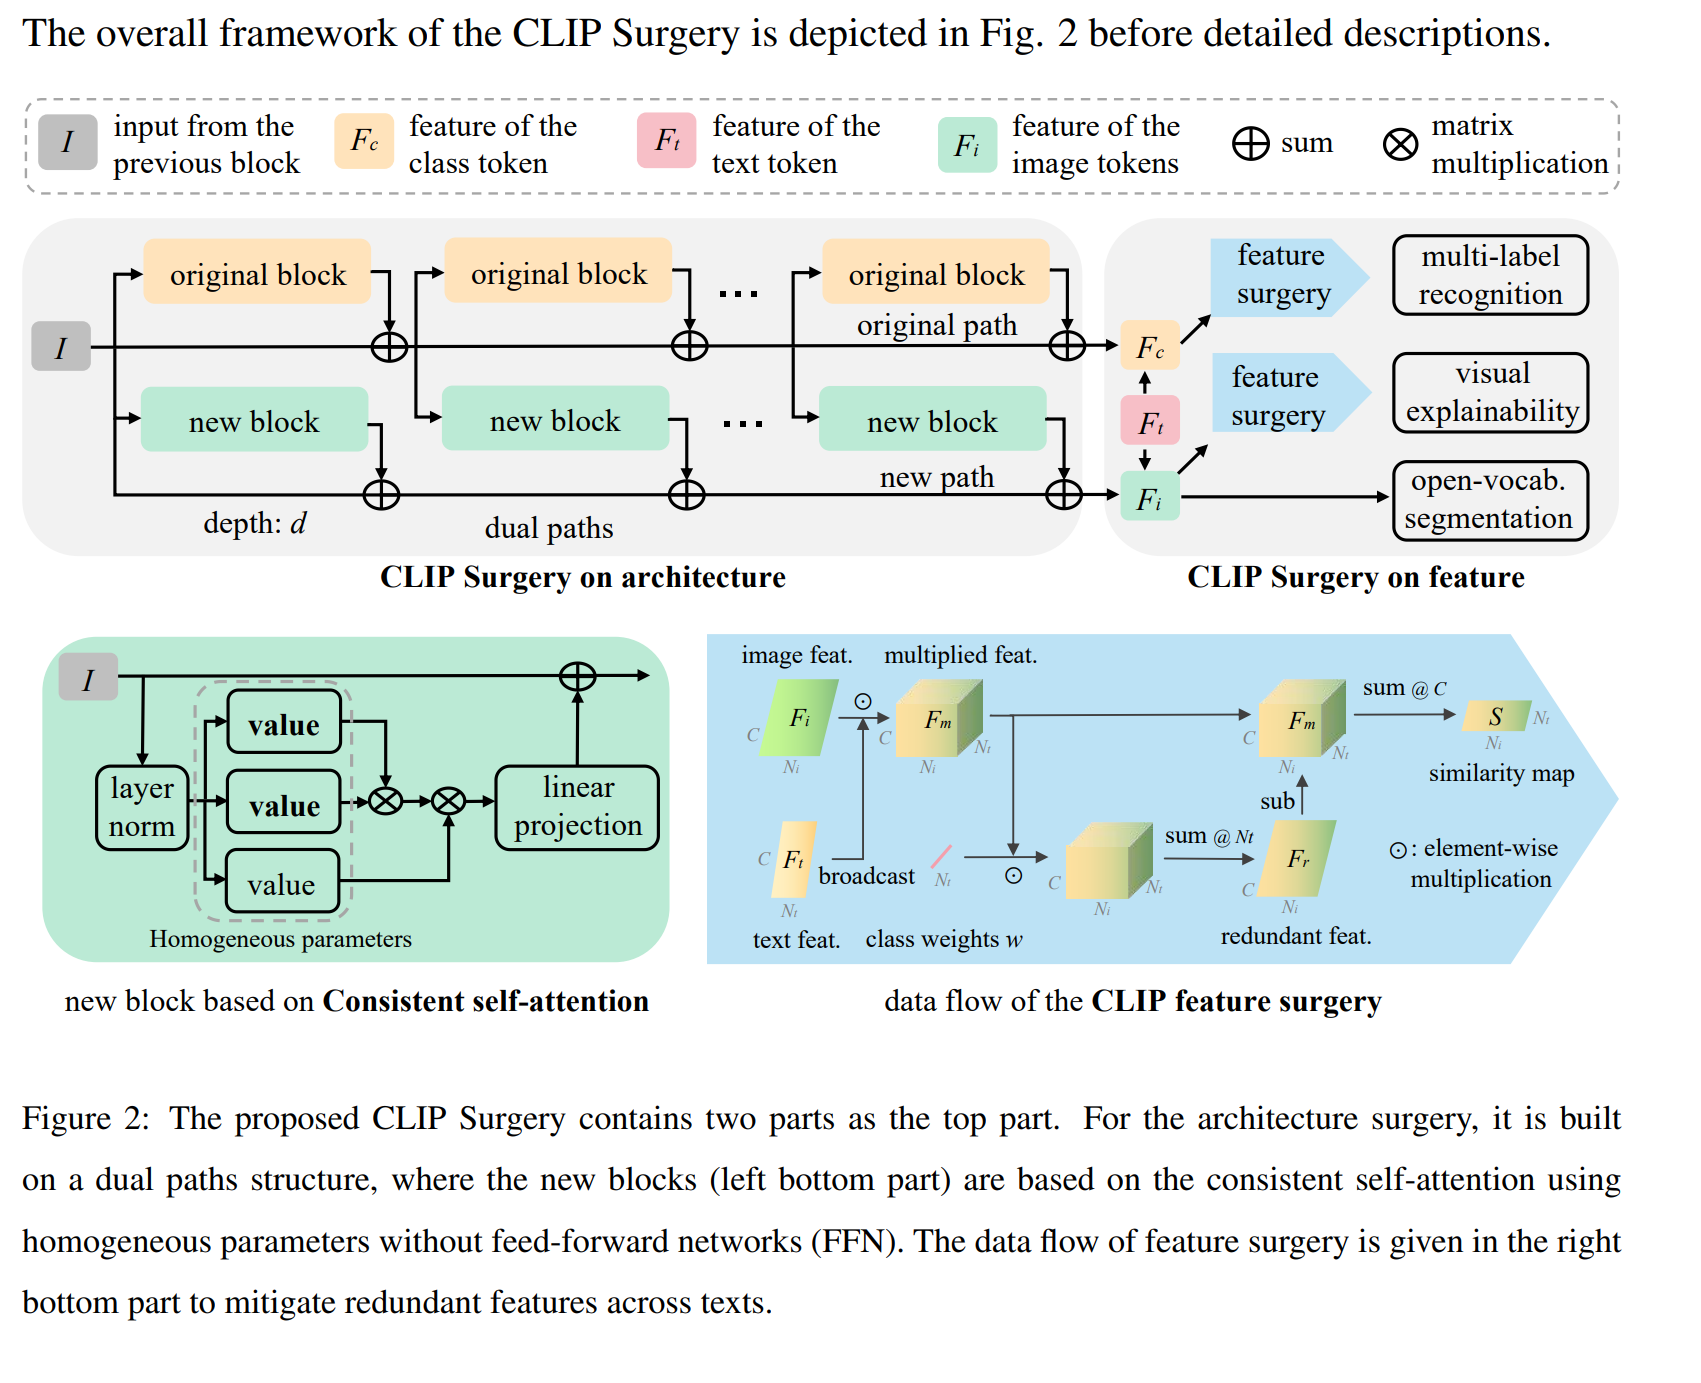